In [1]:
from utils import load_pickle
import os
import json
import statistics
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
    
def extract_logprobs_by_length(save_dict, max_considered = 30):
    mdls = save_dict.keys()
    mean_logprobs = []
    
    for length in range(1, max_considered+1):
        length_logprobs = []
        for mdl in mdls:
            seqs_str = save_dict[mdl].keys()
            for seq_str in seqs_str:
                response = save_dict[mdl][seq_str]
                choices = response['choices']
                openaiobj = choices[0]
                logprobs = openaiobj['logprobs']
                token_logprobs = logprobs['token_logprobs']
                tokens = logprobs['tokens']
                
                seq_logprob = 0
                seq_considered = 0
                for idx in range(len(tokens)):
                    if tokens[idx]!=',' and tokens[idx]!='<|endoftext|>':
                        seq_logprob += token_logprobs[idx]
                        seq_considered += 1
                        if seq_considered == length:
                            break
                length_logprobs.append(seq_logprob)
        mean_logprobs.append(statistics.mean(length_logprobs))
    return(mean_logprobs)


save_path = 'plots/gpt3_by_length.pdf'

max_considered = 30

x = [idx for idx in range(1,max_considered+1)]

filename = './data/ada_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/ada_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_ada = load_pickle(filename)
mean_logprobs_ada = extract_logprobs_by_length(save_dict_ada,max_considered=max_considered)

filename = './data/babbage_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/babbage_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_babbage = load_pickle(filename)
mean_logprobs_babbage = extract_logprobs_by_length(save_dict_babbage,max_considered=max_considered)

filename = './data/curie_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/curie_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_curie = load_pickle(filename)
mean_logprobs_curie = extract_logprobs_by_length(save_dict_curie,max_considered=max_considered)

filename = './data/davinci_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/davinci_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_davinci = load_pickle(filename)
mean_logprobs_davinci = extract_logprobs_by_length(save_dict_davinci,max_considered=max_considered)

y_dict = {'GPT-3 Ada':mean_logprobs_ada, 'GPT-3 Babbage':mean_logprobs_babbage, 'GPT-3 Curie':mean_logprobs_curie, 'GPT-3 Davinci':mean_logprobs_davinci}
x_label = 'Sequence Length'
y_label = 'Sequence Probability'#'Average Log-Probability'
# exponentiate the log probs in y_dict
y_dict = {key:np.exp(y_dict[key]) for key in y_dict.keys()}

In [2]:
def extract_logprobs_by_mdl(save_dict, max_considered = 30):
    mdls = save_dict.keys()
    mean_logprobs = []
    for mdl in mdls:
        seqs_str = save_dict[mdl].keys()
        mdl_logprobs = []
        for seq_str in seqs_str:
            response = save_dict[mdl][seq_str]
            choices = response['choices']
            openaiobj = choices[0]
            logprobs = openaiobj['logprobs']
            token_logprobs = logprobs['token_logprobs']
            tokens = logprobs['tokens']

            seq_logprob = 0
            seq_considered = 0
            for idx in range(len(tokens)):
                if tokens[idx]!=',' and tokens[idx]!='<|endoftext|>':
                    seq_logprob += token_logprobs[idx]
                    seq_considered += 1
                    if seq_considered == max_considered:
                        break
            mdl_logprobs.append(seq_logprob)
        mean_logprobs.append(statistics.mean(mdl_logprobs))
    return(mean_logprobs)
        
save_path = 'plots/gpt3_by_mdl.pdf'

max_considered = 30

x2 = [idx for idx in range(8)]

filename = './data/ada_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/ada_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_ada = load_pickle(filename)
mean_logprobs_ada = extract_logprobs_by_mdl(save_dict_ada,max_considered=max_considered)

filename = './data/babbage_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/babbage_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_babbage = load_pickle(filename)
mean_logprobs_babbage = extract_logprobs_by_mdl(save_dict_babbage,max_considered=max_considered)

filename = './data/curie_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/curie_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_curie = load_pickle(filename)
mean_logprobs_curie = extract_logprobs_by_mdl(save_dict_curie,max_considered=max_considered)

filename = './data/davinci_max_mdl7_length30_prompt200_100seqs_logit_bias_True.pickle'
#filename = './data/davinci_max_mdl7_length30_prompt200_100seqs.pickle'
save_dict_davinci = load_pickle(filename)
mean_logprobs_davinci = extract_logprobs_by_mdl(save_dict_davinci,max_considered=max_considered)

y_dict2 = {'Ada':mean_logprobs_ada, 'Babbage':mean_logprobs_babbage, 'Curie':mean_logprobs_curie, 'Davinci':mean_logprobs_davinci}
# make a list of the GPT3 model sizes as measured in billions of parameters
x_label = 'Minimum Operators'
y_label = 'Probability'
# take exponential of logprobs
y_dict2 = {key:np.exp(y_dict2[key]) for key in y_dict2.keys()}
# add solomonoff prior to y_dict


def binary_coding(s):
    y = (s+1)+ max(0,2*s-1) +2*s#np.ceil(x*np.log2(3))+1
    return y
    # use the prefix kolmogorov complexity adjustment (length needed to encode the length of the sequence)

x2 = [binary_coding(k) for k in x2]  
    
def solomonoff_prior(y):
    y_prefix = y + 2*np.log2(y)
    return (2**(-y_prefix))
y_dict2['Solomonoff Prior'] = [solomonoff_prior(idx) for idx in x2]

In [3]:
import matplotlib.colors as mcolors

In [4]:
colors = list(mcolors.TABLEAU_COLORS)[5:]
perm = [4,0,2,3,1]
colors=[colors[perm[i]] for i in range(len(perm))]

In [5]:
#colors = sns.color_palette("colorblind")[5:]

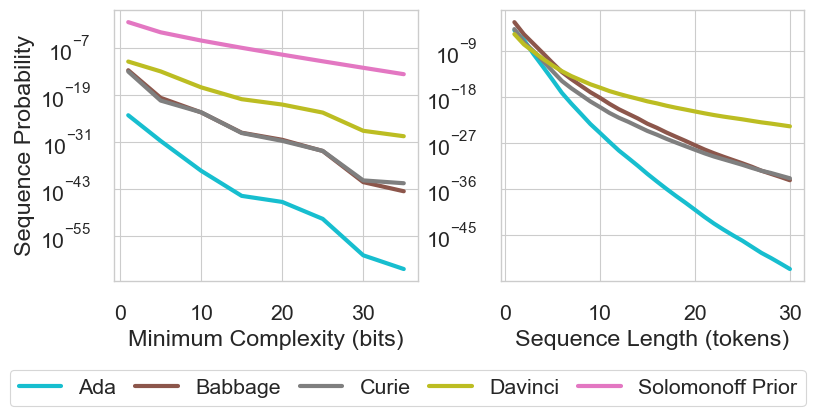

In [6]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})
rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)

sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.75)
fig, ax = plt.subplots(1,2, figsize=(8,3.5), layout='constrained')
for i, key in enumerate(y_dict.keys()):
    y = y_dict[key]
    ax[1].plot(x, y, label=key, color=colors[i],lw=3)
ax[1].set_xlabel('Sequence Length (tokens)')  # Add an x-label to the axes.
ax[1].set_yscale('log')


for i,(key,v) in enumerate(y_dict2.items()):
    ax[0].plot(x2, v, label=key, color=colors[i],lw=3)
ax[0].set_xlabel('Minimum Complexity (bits)')  # Add an x-label to the axes.
ax[0].set_ylabel('Sequence Probability')  # Add a y-label to the axes.
ax[0].set_yscale('log')
handles, labels = ax[0].get_legend_handles_labels()
lgd = fig.legend(labels=labels, bbox_to_anchor=(0, -.15, 1., 0.), loc="lower center", ncol=len(labels), borderaxespad=0.1, mode="expand")
fig.savefig('plots/gpt3.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('plots/gpt3.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


In [7]:
import pandas as pd

In [8]:
names = ['Cosine', 'Polynomial Degree 2','Polynomial Degree 10']
dfs = [pd.read_csv('data/'f'{name}_polynomial.csv') for name in names]


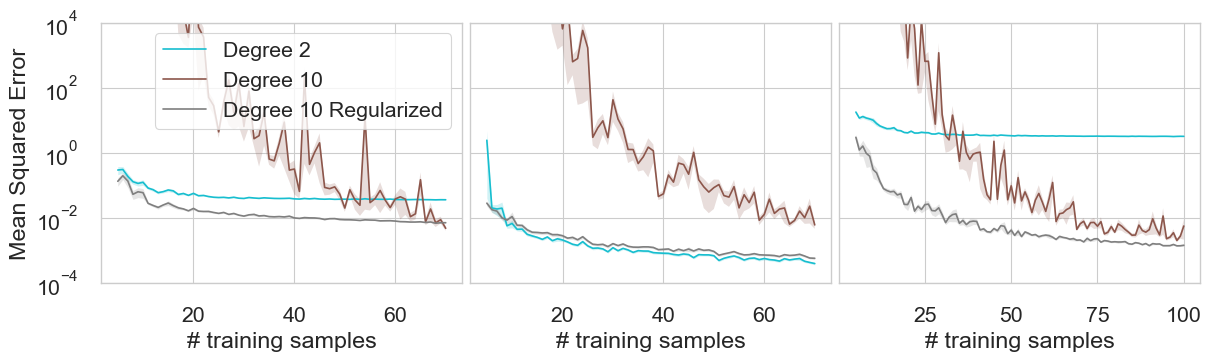

In [9]:
fig, ax = plt.subplots(1,3, figsize=(12,3.5), layout='constrained',sharey=True)
ax[0].set_ylabel('Mean Squared Error')
for a,df,i in zip(ax,dfs,range(len(dfs))):
    a.set_ylim(1e-4,1e+4)
    a.set_yscale('log')
    a.set_xlabel('# training samples')
    
    
    
    for k in range(3):
        a.plot(df['x'],df[df.columns[1+k]],label=df.columns[1+k],color=colors[k])
        a.fill_between(df['x'],df[df.columns[1+k]]-df[df.columns[4+k]],df[df.columns[1+k]]+df[df.columns[4+k]], alpha=0.2,linewidth=0,color=colors[k])
    if i==0: a.legend() 
handles, labels = ax[0].get_legend_handles_labels()
plt.savefig('plots/polynomial.pdf') 


In [10]:
prob_init = load_pickle('data/prob_by_mdl_init_length10_logprob.pickle')
prob_pretrained = load_pickle('data/prob_by_mdl_pretrained_length10_logprob.pickle')
acc_init = load_pickle('data/acc_by_mdl_init_length10.pickle')
acc_pretrained = load_pickle('data/acc_by_mdl_pretrained_length10.pickle')
sequence_length=10
x = [idx for idx in range(1, sequence_length+1)]
styles = {'GPT-2 initialized':'-', 'GPT-2-medium init.':'-', 'gpt-large init.':'-', 'GPT-2 trained': '-', 'GPT-2-medium trained': ':', 'gpt-large trained': ':', 'uniform distribution':'-.', 'Solomonoff prior':'-.'}
# Dict where each key is an axis label and the value is the y values
prob_10 = {}
prob_10['Solomonoff prior'] = [prob_init[4][k] for k in range(1, sequence_length+1)]
prob_10['uniform distribution'] = [prob_init[5][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-nano init.'] = [prob_init[0][k] for k in range(1, sequence_length+1)]
prob_10['GPT-2 initialized'] = [prob_init[1][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-2-medium init.'] = [prob_init[2][k] for k in range(1, sequence_length+1)]
#prob_10['gpt-large init.'] = [prob_init[3][k] for k in range(1, sequence_length+1)]
prob_10['GPT-2 trained'] = [prob_pretrained[0][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-2-medium trained'] = [prob_pretrained[1][k] for k in range(1, sequence_length+1)]
#prob_10['gpt-large trained'] = [prob_pretrained[2][k] for k in range(1, sequence_length+1)]

# Dict where each key is an axis label and the value is the y values
acc_10 = {}
acc_10['Solomonoff prior'] = [acc_init[4][k] for k in range(1, sequence_length+1)]
acc_10['uniform distribution'] = [0.5 for k in range(1, sequence_length+1)]
#acc_10['GPT-nano init.'] = [acc_init[0][k] for k in range(1, sequence_length+1)]
acc_10['GPT-2 initialized'] = [acc_init[1][k] for k in range(1, sequence_length+1)]
#acc_10['GPT-2-medium init.'] = [acc_init[2][k] for k in range(1, sequence_length+1)]
#acc_10['gpt-large init.'] = [acc_init[3][k] for k in range(1, sequence_length+1)]
acc_10['GPT-2 trained'] = [acc_pretrained[0][k] for k in range(1, sequence_length+1)]
#acc_10['GPT-2-medium trained'] = [acc_pretrained[1][k] for k in range(1, sequence_length+1)]
#acc_10['gpt-large trained'] = [acc_pretrained[2][k] for k in range(1, sequence_length+1)]


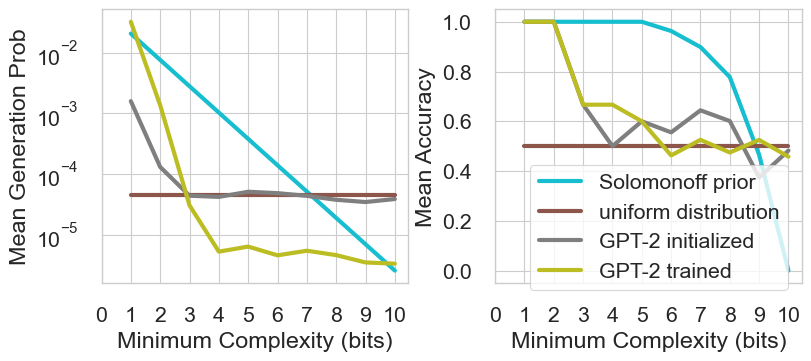

In [11]:
fig, ax = plt.subplots(1,2, figsize=(8,3.5), layout='constrained')

for i,(key,v) in enumerate(prob_10.items()):
    ax[0].plot(x, np.exp(v), label=key, color=colors[i],lw=3)
ax[0].set_xlabel('Minimum Complexity (bits)')  # Add an x-label to the axes.
ax[0].set_ylabel('Mean Generation Prob')  # Add a y-label to the axes.
ax[0].set_yscale('log')

for i,(key,v) in enumerate(acc_10.items()):
    ax[1].plot(x, v, label=key, color=colors[i],lw=3)
ax[1].set_xlabel('Minimum Complexity (bits)')  # Add an x-label to the axes.
ax[1].set_ylabel('Mean Accuracy')  # Add a y-label to the axes.
handles, labels = ax[0].get_legend_handles_labels()
ax[1].xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[0].xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
lgd = fig.legend(labels=labels, loc="lower right", ncol=1, borderaxespad=0.1, bbox_to_anchor=(0, .18, .98, 0.),)
plt.savefig('plots/gpt2.pdf') 

In [12]:
from collections import OrderedDict
y_dict = OrderedDict()

#y_dict['Swin-B'] = [74.710, 64.200, 83.582]
y_dict['GoogLeNet'] = [93.840, 75.160, 69.778]
y_dict['ViT-B/16'] = [72.020, 48.140, 81.072]
y_dict['GoogLeNet + ViT'] = [93.860, 71.990, 81.090]
labels = ['CIFAR-10', 'CIFAR-100', 'ImageNet'] # group names

df_dicts = []
for model,values in y_dict.items():
    for label,val in zip(labels,values):
        df_dicts.append({'model':model,'Dataset':label,'Accuracy':val})
        
df = pd.DataFrame(df_dicts)

y_label = 'Test Accuracy'
title = None
save_path = 'plots/bar_plot_combined_models.pdf'

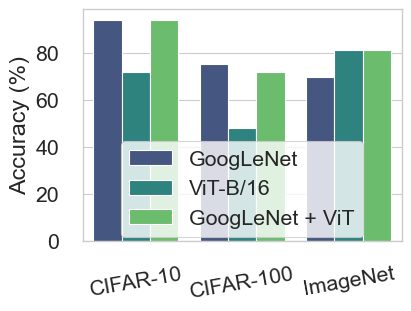

In [13]:
fig, ax = plt.subplots(1,1, figsize=(4,3), layout='constrained')
plt.xticks(rotation=10, ha='center')
g = sns.barplot(data=df,x='Dataset',y='Accuracy',hue='model',ax=ax,palette='viridis')
g.legend_.remove()
ax.set_xlabel('')
ax.set_ylabel('Accuracy (%)')
ax.legend(loc='lower center',title='',bbox_to_anchor=(0, -.03, 1, 0.))
plt.savefig('plots/barplot.pdf')

In [15]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

with open('../tabular_compression/test_several_long_smalld/results.df','rb') as f:
    df = pickle.load(f)
    print(list(df.columns))
    for dataset in np.unique(df['dataset']):
        df2 = df[df['dataset']==dataset]
df2 = df.iloc[df.groupby(['dataset'])['raw_err_bound_100'].idxmin()]

['d', 'dataset', 'log_suffix', 'Minibatch_Loss', 'Train_Acc', 'lr0', 'test_Acc', 'val_Acc', 'time', 'subspace_params', 'base_params', 'num_classes', 'ds_size', 'raw_quant_train_err_100', 'raw_quant_test_err_100', 'raw_divergence_gains', 'raw_err_bound_100', 'raw_misc_extra_bits', 'train_nll_bits', 'prefix_message_len', 'train_err_100', 'test_err_100']


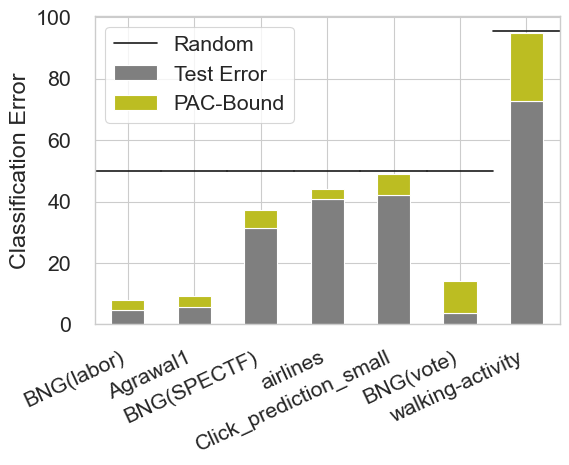

In [16]:
import seaborn as sns
import numpy as np
import matplotlib

data = df2.sort_values(by='ds_size',axis=0,ascending=False)
data = data.reset_index()
d1 = data.copy()
d1['metric'] = 'raw_err_bound_100'
d1['metric_type'] = 'Bound'
d2 = data.copy()
d2['metric'] = 'test_err_100'
d1['metric_type'] = 'Test Error'
data2 = pd.concat([d1,d2])
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.75) 
fig, ax = plt.subplots(1, 1, figsize=(6,4))
data['bound_diff'] = data['raw_err_bound_100']-data['test_err_100']
data.set_index('dataset')[['test_err_100','bound_diff']].plot(kind='bar', stacked=True,ax=ax, color=colors[-3:-1])
plt.xticks(rotation=25, ha='right')
plt.ylabel('Classification Error')
ax.set(xlabel=None)
ax.plot(np.arange(1),100*(1-1/data['num_classes'])[0],color='k')
ax.legend(['Random','Test Error','PAC-Bound'])
vals = 100*(1-1/data['num_classes'])
for i,val in enumerate(vals):
    ax.plot(np.linspace(i-.5,i+.5,2),val*np.ones(2),color='k')

plt.savefig('pac-tabular.pdf', bbox_inches='tight')

In [17]:
with open('../tabular_compression/tabular_label_compression/results.df','rb') as f:
    df = pickle.load(f)

In [21]:
df['total_bits'] = df['train_nll_bits']+df['prefix_message_len']
df2 = df.iloc[df.groupby(['dataset'])['total_bits'].idxmin()]
data = df2.sort_values(by='ds_size',axis=0,ascending=False)
data = data.reset_index()


d1 = data.copy()
d1['metric'] = 'raw_err_bound_100'
d1['metric_type'] = 'Bound'
d2 = data.copy()
d2['metric'] = 'test_err_100'
d1['metric_type'] = 'Test Error'
data2 = pd.concat([d1,d2])
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.75) 
fig, ax = plt.subplots(1, 1, figsize=(6,4))
data['Model Bits'] = data['prefix_message_len']/8000
data['NLL Bits'] = data['train_nll_bits']/8000
data.set_index('dataset')[['NLL Bits','Model Bits']].plot(kind='bar', stacked=True,ax=ax, color=colors[-3:-1])
plt.xticks(rotation=25, ha='right')
plt.ylabel('Compressed Labels (KB)')
ax.set(xlabel=None)
ax.plot(np.arange(1),100*(1-1/data['num_classes'])[0],color='k')
ax.legend(['Uncompressed','NLL Bits','Model Bits'])

vals = np.log2(data['num_classes'])*data['ds_size']/8000

for i,val in enumerate(vals):
    ax.plot(np.linspace(i-.3,i+.3,2),val*np.ones(2),color='k')
plt.savefig('label-compression-tabular.pdf', bbox_inches='tight')

KeyError: 'train_nll_bits'

In [22]:
with open('../tabular_compression/img_label_compression/results.df','rb') as f:
    df = pickle.load(f)
df['dataset'] = df['dataset'].str.replace('cifar','CIFAR-')
df['dataset'] = df['dataset'].str.upper()

FileNotFoundError: [Errno 2] No such file or directory: '../tabular_compression/img_label_compression/results.df'

In [23]:
df.head()

,model,Dataset,Accuracy
0,GoogLeNet,CIFAR-10,93.840
1,GoogLeNet,CIFAR-100,75.160
2,GoogLeNet,ImageNet,69.778
3,ViT-B/16,CIFAR-10,72.020
4,ViT-B/16,CIFAR-100,48.140


In [24]:
df['total_bits'] = df['train_nll_bits']+df['prefix_message_len']
df2 = df.iloc[df.groupby(['dataset'])['total_bits'].idxmin()]
data = df2.sort_values(by='ds_size',axis=0,ascending=False)
data = data.reset_index()


d1 = data.copy()
d1['metric'] = 'raw_err_bound_100'
d1['metric_type'] = 'Bound'
d2 = data.copy()
d2['metric'] = 'test_err_100'
d1['metric_type'] = 'Test Error'
data2 = pd.concat([d1,d2])
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.75) 
fig, ax = plt.subplots(1, 1, figsize=(6,4))
data['Model Bits'] = data['prefix_message_len']/8000
data['NLL Bits'] = data['train_nll_bits']/8000
data.set_index('dataset')[['NLL Bits','Model Bits']].plot(kind='bar', stacked=True,ax=ax, color=colors[-3:-1])
plt.xticks(rotation=0, ha='center')
plt.ylabel('Compressed Labels (KB)')
ax.set(xlabel=None)
ax.plot(np.arange(1),100*(1-1/data['num_classes'])[0],color='k')
ax.legend(['Uncompressed','NLL Bits','Model Bits'])

vals = np.log2(data['num_classes'])*data['ds_size']/8000

for i,val in enumerate(vals):
    ax.plot(np.linspace(i-.3,i+.3,2),val*np.ones(2),color='k')
fig.savefig('label-compression-img.pdf', bbox_inches='tight')

KeyError: 'train_nll_bits'

In [25]:
prob_init = load_pickle('data/prob_by_mdl_init_length10_logprob.pickle')
prob_pretrained = load_pickle('data/prob_by_mdl_pretrained_length10_logprob.pickle')
acc_init = load_pickle('data/acc_by_mdl_init_length10.pickle')
acc_pretrained = load_pickle('data/acc_by_mdl_pretrained_length10.pickle')
sequence_length=10
x = [idx for idx in range(1, sequence_length+1)]
styles = {'GPT-2 initialized':'-', 'GPT-2-medium init.':'-', 'GPT-2-large init.':'-', 'GPT-2 trained': '-', 'GPT-2-medium trained': ':', 'gpt-large trained': ':', 'uniform distribution':'-.', 'Solomonoff prior':'-.'}
# Dict where each key is an axis label and the value is the y values
prob_10 = {}
prob_10['Solomonoff prior'] = [prob_init[4][k] for k in range(1, sequence_length+1)]
prob_10['uniform distribution'] = [prob_init[5][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-nano init.'] = [prob_init[0][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-2 initialized'] = [prob_init[1][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-2-medium init.'] = [prob_init[2][k] for k in range(1, sequence_length+1)]
prob_10['GPT-2-large init.'] = [prob_init[3][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-2 trained'] = [prob_pretrained[0][k] for k in range(1, sequence_length+1)]
#prob_10['GPT-2-medium trained'] = [prob_pretrained[1][k] for k in range(1, sequence_length+1)]
prob_10['GPT-2-large trained'] = [prob_pretrained[2][k] for k in range(1, sequence_length+1)]

# Dict where each key is an axis label and the value is the y values
acc_10 = {}
acc_10['Solomonoff prior'] = [acc_init[4][k] for k in range(1, sequence_length+1)]
acc_10['uniform distribution'] = [0.5 for k in range(1, sequence_length+1)]
#acc_10['GPT-nano init.'] = [acc_init[0][k] for k in range(1, sequence_length+1)]
#acc_10['GPT-2 initialized'] = [acc_init[1][k] for k in range(1, sequence_length+1)]
#acc_10['GPT-2-medium init.'] = [acc_init[2][k] for k in range(1, sequence_length+1)]
acc_10['GPT-2-large init.'] = [acc_init[3][k] for k in range(1, sequence_length+1)]
#acc_10['GPT-2 trained'] = [acc_pretrained[0][k] for k in range(1, sequence_length+1)]
#acc_10['GPT-2-medium trained'] = [acc_pretrained[1][k] for k in range(1, sequence_length+1)]
acc_10['GPT-2-large trained'] = [acc_pretrained[2][k] for k in range(1, sequence_length+1)]

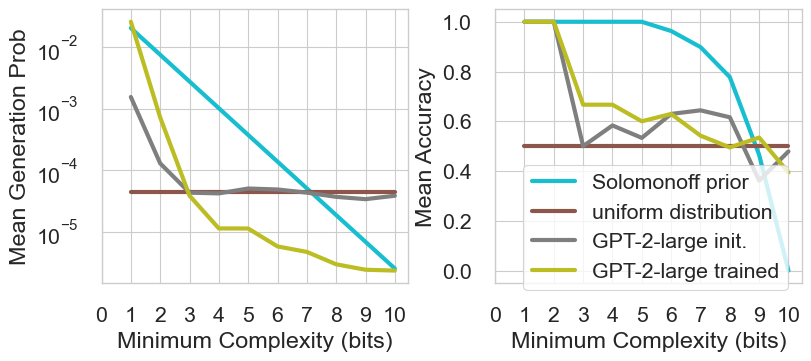

In [26]:
fig, ax = plt.subplots(1,2, figsize=(8,3.5), layout='constrained')


for i,(key,v) in enumerate(prob_10.items()):
    ax[0].plot(x, np.exp(v), label=key, color=colors[i],lw=3)
ax[0].set_xlabel('Minimum Complexity (bits)')  # Add an x-label to the axes.
ax[0].set_ylabel('Mean Generation Prob')  # Add a y-label to the axes.
ax[0].set_yscale('log')
for i,(key,v) in enumerate(acc_10.items()):
    ax[1].plot(x, v, label=key, color=colors[i],lw=3)
ax[1].set_xlabel('Minimum Complexity (bits)')  # Add an x-label to the axes.
ax[1].set_ylabel('Mean Accuracy')  # Add a y-label to the axes.
handles, labels = ax[0].get_legend_handles_labels()

ax[1].xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[0].xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
lgd = fig.legend(labels=labels, loc="lower right", ncol=1, borderaxespad=0.1, bbox_to_anchor=(0, .18, .98, 0.),)
plt.savefig('plots/gpt2_large.pdf') 